In [1]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import norm
import sklearn.linear_model as linear_model
import seaborn as sns
from sklearn.model_selection import KFold
from IPython.display import HTML, display
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pickle

In [2]:
#Read 
dust_2019 = pd.read_excel("2019_Seoul_Dust.xlsx")

In [3]:
dust_2018 = pd.read_excel("일별평균대기오염도_2018.xlsx")

In [4]:
dust_2019.head()

,측정일시,측정소명,이산화질소농도(ppm),오존농도(ppm),이산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
0,20190331,강남구,0.012,0.029,0.3,0.005,38.0,26.0
1,20190331,강남대로,0.027,0.038,0.5,0.003,54.0,27.0
2,20190331,강동구,0.014,0.035,0.4,0.003,42.0,29.0
3,20190331,강변북로,0.031,0.023,0.3,0.003,50.0,27.0
4,20190331,강북구,0.009,0.041,0.4,0.002,48.0,27.0


In [5]:
dust_df = pd.concat([dust_2018, dust_2019], ignore_index=True)

In [6]:
dust_df.info

<bound method DataFrame.info of            측정일시  측정소명  이산화질소농도(ppm)  오존농도(ppm)  이산화탄소농도(ppm)  아황산가스(ppm)  \
0      20180101   강남구         0.033      0.010           0.6       0.006   
1      20180101  강남대로         0.040      0.007           0.8       0.006   
2      20180101   강동구         0.038      0.010           0.7       0.005   
3      20180101  강변북로         0.033      0.008           0.6       0.005   
4      20180101   강북구         0.026      0.018           0.6       0.004   
5      20180101   강서구         0.036      0.012           0.7       0.004   
6      20180101  공항대로         0.045      0.007           0.6       0.006   
7      20180101   관악구         0.036      0.008           0.5       0.008   
8      20180101   광진구         0.037      0.012           0.7       0.005   
9      20180101   구로구         0.025      0.008           0.6       0.007   
10     20180101   금천구         0.036      0.010           0.6       0.005   
11     20180101   노원구         0.034      0.012          

In [7]:
dust_df = dust_df.drop(columns = ["이산화질소농도(ppm)",  "오존농도(ppm)",  "이산화탄소농도(ppm)",  "아황산가스(ppm)"])

In [8]:
dust_df["측정일시"] = dust_df["측정일시"].astype(int)

In [9]:
dust_df.head()

,측정일시,측정소명,미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
0,20180101,강남구,34.0,22.0
1,20180101,강남대로,NaN,17.0
2,20180101,강동구,48.0,24.0
3,20180101,강변북로,48.0,15.0
4,20180101,강북구,38.0,18.0


In [10]:
dust_df = dust_df.groupby(["측정일시"]).mean()

In [11]:
dust_df.reset_index(level=dust_df.index.names, inplace=True)

In [12]:
dust_df.head()

,측정일시,미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
0,20180101,44.171429,20.081081
1,20180102,43.378378,21.540541
2,20180103,36.894737,17.842105
3,20180104,47.657895,23.947368
4,20180105,60.236842,34.973684


In [13]:
dust_mask = dust_df["측정일시"] <= 20180331

In [14]:
dust_inrange= dust_df[~dust_mask]

In [15]:
dust_inrange["측정일시"]

78     20180409
79     20180410
80     20180411
81     20180412
82     20180413
83     20180414
84     20180415
85     20180416
86     20180417
87     20180418
88     20180419
89     20180421
90     20180422
91     20180423
92     20180424
93     20180425
94     20180426
95     20180427
96     20180428
97     20180429
98     20180430
99     20180501
100    20180502
101    20180503
102    20180504
103    20180505
104    20180506
105    20180507
106    20180508
107    20180509
         ...   
362    20190223
363    20190224
364    20190225
365    20190226
366    20190227
367    20190228
368    20190301
369    20190302
370    20190303
371    20190304
372    20190305
373    20190306
374    20190307
375    20190308
376    20190314
377    20190315
378    20190318
379    20190319
380    20190320
381    20190321
382    20190322
383    20190323
384    20190324
385    20190325
386    20190326
387    20190327
388    20190328
389    20190329
390    20190330
391    20190331
Name: 측정일시, Length: 314,

In [16]:
with open("ddict.pickle", "rb") as f : 
    ddict = pickle.load(f)

In [17]:
dates = list(ddict.keys())

In [18]:
ddict = None

In [19]:
not_in_d = []
for i in dates : 
    if i not in list(dust_inrange["측정일시"]) :
        not_in_d.append(i)
        

In [20]:
with open("ordernumpy.pickle", "rb") as f : 
    onp = pickle.load(f)

In [21]:
#get_date time 
import datetime
def get_date(integer) : 
    year = integer // 10**4
    integer = integer % 10**4
    month = integer // 10**2
    day = integer % 10**2
    return datetime.datetime(year, month, day)

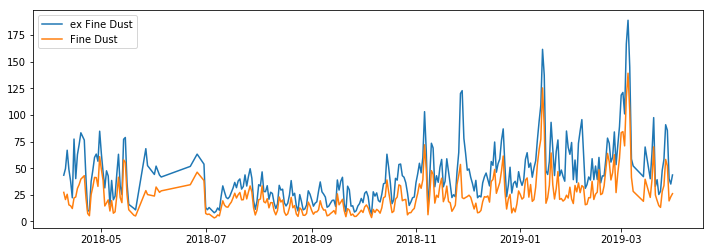

In [22]:
dust_date = list(dust_inrange["측정일시"].map(get_date))
dust_sc = list(dust_inrange["미세먼지(㎍/㎥)"])
dust_bc = list(dust_inrange["초미세먼지(㎍/㎥)"])

f, ax = plt.subplots(1,1)

x_col = "날짜"
y_col = "농도"

sns.lineplot(dust_date, dust_sc, label = "ex Fine Dust")
sns.lineplot(dust_date, dust_bc, label = "Fine Dust")
#sns.set(title = "Dust Concentration")


ax.figure.set_figwidth(12)

In [23]:
dust_inrange["FD_index"] = (dust_inrange["미세먼지(㎍/㎥)"] + dust_inrange["초미세먼지(㎍/㎥)"])/2

C:\Users\Choi Sung Wook\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [24]:
dust_inrange.head()

,측정일시,미세먼지(㎍/㎥),초미세먼지(㎍/㎥),FD_index
78,20180409,43.435897,27.333333,35.384615
79,20180410,49.615385,20.589744,35.102564
80,20180411,66.871795,25.538462,46.205128
81,20180412,48.820513,15.589744,32.205128
82,20180413,37.948718,14.743590,26.346154


In [25]:
dust_inrange

,측정일시,미세먼지(㎍/㎥),초미세먼지(㎍/㎥),FD_index
78,20180409,43.435897,27.333333,35.384615
79,20180410,49.615385,20.589744,35.102564
80,20180411,66.871795,25.538462,46.205128
81,20180412,48.820513,15.589744,32.205128
82,20180413,37.948718,14.743590,26.346154
83,20180414,22.256410,12.179487,17.217949
84,20180415,77.358974,22.128205,49.743590
85,20180416,40.230769,23.000000,31.615385
86,20180417,62.794872,31.051282,46.923077
87,20180418,72.256410,34.692308,53.474359


In [26]:
dust_index = dust_inrange.drop(columns = ["미세먼지(㎍/㎥)", "초미세먼지(㎍/㎥)"])

In [27]:
di_dict = dust_index.set_index("측정일시")["FD_index"].to_dict()

In [28]:
templist = list(di_dict.values())
templist.sort()
temp = templist[int(len(di_dict) / 2)]

In [29]:
temp

30.675675675675674

In [30]:
#Compute DUST GRADE
m,n = 0, 0
for i in di_dict :
    if di_dict[i] >= temp :
        m +=1
        di_dict[i] = 1 
    else :
        n +=1
        di_dict[i] = 0

In [31]:
di_dict.values()

dict_values([1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1])

이제 FD_index를 Week_df 엑셀에 추가한다

In [32]:
wdf = pd.read_csv("Week_Data.csv")

In [33]:
wdf["STD_DD"]

0          20180402
1          20180402
2          20180402
3          20180402
4          20180402
5          20180402
6          20180402
7          20180402
8          20180402
9          20180402
10         20180402
11         20180402
12         20180402
13         20180402
14         20180402
15         20180402
16         20180402
17         20180402
18         20180402
19         20180402
20         20180402
21         20180402
22         20180402
23         20180402
24         20180402
25         20180402
26         20180402
27         20180402
28         20180402
29         20180402
             ...   
1547053    20190329
1547054    20190329
1547055    20190329
1547056    20190329
1547057    20190329
1547058    20190329
1547059    20190329
1547060    20190329
1547061    20190329
1547062    20190329
1547063    20190329
1547064    20190329
1547065    20190329
1547066    20190329
1547067    20190329
1547068    20190329
1547069    20190329
1547070    20190329
1547071    20190329


In [34]:
def ret_FD_index(date) : 
    if date in di_dict :
        return di_dict[date]
    else :
        return 9

In [35]:
#Append Dust GRADE
wdf["FD_index"] = [ret_FD_index(r) for r in wdf["STD_DD"]]

In [36]:
wdf.tail()

,STD_DD,GU_CD,DONG_CD,MCT_CAT_CD,SEX_CD,AGE_CD,USE_CNT,USE_AMT,day,month,...,TD_6,TD_7,TD_8,TD_9,TD_10,TD_11,TD_12,TD_13,TD_14,FD_index
1547078,20190329,350,720,81,M,40,9,55,363,15,...,4,2,2,1,1,5,5,7,4,0
1547079,20190329,350,720,81,M,45,9,75,363,15,...,4,2,2,1,1,5,5,7,4,0
1547080,20190329,350,720,81,M,50,5,114,363,15,...,4,2,2,1,1,5,5,7,4,0
1547081,20190329,350,720,81,M,55,5,35,363,15,...,4,2,2,1,1,5,5,7,4,0
1547082,20190329,350,720,81,M,60,5,18,363,15,...,4,2,2,1,1,5,5,7,4,0


In [37]:
len(set(wdf["STD_DD"]))

260

In [38]:
wdf.to_csv("Week_Data_C.csv", index = False)